In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 50)


In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

##### -----------------------------------

## 데이터 불러오기 및 병합

### 개별 파일 병합

In [4]:
#엑셀로 정비 후 각 파일 로드 
Small_2017 = pd.read_excel('data/Small_data_17.xlsx')
Small_2018 = pd.read_excel('data/Small_data_18.xlsx')
Small_2019 = pd.read_excel('data/Small_data_19.xlsx')
Small_2020 = pd.read_excel('data/Small_data_20.xlsx')
Small_2021 = pd.read_excel('data/Small_data_21.xlsx')

### 개별 파일 살피기

In [5]:
# 1. 기본적인 사항 확인 - 컬럼명
# 병합 후 컬럼 명을 보기 명확하게 해야할 필요성

Small_2017.columns
Small_2018.columns
Small_2019.columns
Small_2020.columns
Small_2021.columns


Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)'],
      dtype='object')

In [6]:
# 2. 기본적인 사항 확인 - 데이터 수 ,결측치, 데이터 타입

Small_2017.info()
Small_2018.info()
Small_2019.info()
Small_2020.info()
Small_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   연번                     6058 non-null   int64  
 1   도서관 명                  6058 non-null   object 
 2   개관일                    6058 non-null   int64  
 3   지역                     6058 non-null   object 
 4   도서관 유형 (1.공립,2사립)      6058 non-null   int64  
 5   특화여부 (1: 아님)           5234 non-null   float64
 6   일평균                    6054 non-null   float64
 7   연간 총 운영일               6053 non-null   float64
 8   건물면적(㎡)                6058 non-null   float64
 9   열람(석)                  6058 non-null   int64  
 10  도서관자료(권)               6058 non-null   int64  
 11  현재 총 보유장서의 수(권)        6058 non-null   int64  
 12  현재 총 보유 연속간행물의 수(종)    6058 non-null   int64  
 13  직원1(상근직원 수)            6058 non-null   int64  
 14  직원2(시간제 직원 수)          6058 non-null   int64  
 15  정기적 

In [7]:
# 3. head()를 이용해 각 데이터의 앞 부분 확인
# 병합 후 연번을 삭제하거나 수정해야할 필요성

Small_2017.head(3)
Small_2018.head(3)
Small_2019.head(3)
Small_2020.head(3)
Small_2021.head(3)

,연번,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건)
0,1,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,247.0,38.50,13,5389,5389,0,2,4,13,1,0,12600000,0,12600000,Y,4845.0,2223,1365.0,Y,9.0,170.0,819.0,9.0,161.0,818.0,Y,Y,1.0,12600000.0,406.0,3.0
1,2,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,7.0,313.0,132.00,25,5235,5235,2,1,1,12,5,1800000,7200000,3400000,12400000,Y,5500.0,3130,NaN,Y,2.0,80.0,480.0,10.0,75.0,900.0,Y,Y,0.0,1800000.0,170.0,1.0
2,3,도담도담한옥도서관,20140213,서울특별시,1,1.0,9.0,313.0,107.87,30,5286,5286,0,1,1,1,15,4500000,18600000,11436000,34536000,Y,5824.0,5321,1891.0,Y,3.0,72.0,360.0,5.0,132.0,924.0,Y,Y,NaN,1500000.0,NaN,NaN


,연번,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건)
0,1,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,248.0,38.50,13,5367,5367,9,2,0,0,0,4500000,15600000,660000,20760000,Y,4973.0,8928,1468.0,Y,16.0,181.0,1125.0,NaN,NaN,NaN,Y,Y,NaN,20760000.0,NaN,3.0
1,2,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,8.0,313.0,132.00,25,5383,5383,2,1,1,12,6,1800000,7200000,3200000,12200000,Y,4500.0,3130,NaN,Y,2.0,23.0,230.0,16.0,110.0,1200.0,Y,N,NaN,NaN,NaN,NaN
2,3,도담도담한옥도서관,20140213,서울특별시,1,1.0,9.0,313.0,107.87,30,5286,5286,3,1,1,10,25,4500000,18600000,660000,23760000,Y,6718.0,4695,2154.0,Y,5.0,240.0,1920.0,5.0,240.0,1200.0,Y,Y,NaN,NaN,NaN,3.0


,연번,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건)
0,1,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,207.0,38.50,13,5367,5367.0,7.0,2.0,0.0,0.0,0.0,4500000.0,15095500.0,864500.0,20460000.0,Y,4783.0,6210.0,1616.0,Y,17.0,131.0,1217.0,0.0,0.0,0.0,Y,Y,2.0,3500000.0,0.0,49.0
1,2,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,6.0,313.0,132.00,25,5708,5708.0,0.0,1.0,1.0,5.0,15.0,2000000.0,7200000.0,9600000.0,18800000.0,Y,3500.0,3756.0,NaN,Y,2.0,70.0,910.0,8.0,40.0,400.0,Y,N,NaN,NaN,NaN,NaN
2,3,도담도담한옥도서관,20140213,서울특별시,1,NaN,9.0,313.0,107.87,30,6780,6780.0,5.0,1.0,1.0,6.0,2.0,5000000.0,22440000.0,3600000.0,31040000.0,Y,8392.0,15650.0,NaN,Y,6.0,41.0,344.0,9.0,72.0,691.0,Y,N,NaN,NaN,NaN,NaN


,연번,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건)
0,1,경희궁자이3단지 작은도서관,20200924,서울특별시,2,1.0,8,365,65.6,28,2556,2556,0,0,0,1,0,0,0,52000,52000,N,NaN,4320,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,2,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8,127,38.5,13,4654,4654,7,2,5,0,0,2895000,14607000,435000,17937000,Y,1672.0,446,1651.0,Y,NaN,NaN,NaN,6.0,10.0,65.0,Y,Y,2.0,NaN,193.0,1.0
2,3,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,8,200,132.0,25,5820,5820,1,1,0,2,1,2000000,1200000,9600000,12800000,Y,520.0,2500,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,Y,NaN,2108000.0,154.0,NaN


,연번,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건)
0,1,경희궁자이3단지 작은도서관,20200924,서울특별시,2,1.0,18,365,65.6,28,2556,2556,0,0,0,0,1,0,0,0,0,N,NaN,1095,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,Y,0.0,0.0,60.0,NaN
1,2,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8,249,38.5,13,4971,4971,7,2,0,6,0,0,13680000,720000,14400000,Y,3144.0,4233,1734.0,Y,NaN,5.0,NaN,16.0,78.0,5.0,Y,Y,0.0,14400000.0,304.0,3.0
2,3,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,6,313,132.0,25,6520,6520,1,1,0,1,2,2000000,1200000,11000000,14200000,Y,450.0,2800,NaN,Y,100.0,3.0,500.0,50.0,250.0,3.0,Y,Y,0.0,2350000.0,150.0,0.0


In [8]:
# 3. 각 파일에 [조사연도] 컬럼 추가

# 합친 데이터에서 연도를 확인해보기 위함

Small_2017['조사연도'] = '2017'
Small_2018['조사연도'] = '2018'
Small_2019['조사연도'] = '2019'
Small_2020['조사연도'] = '2020'
Small_2021['조사연도'] = '2021'


# 잘 되었는지 확인
Small_2017.columns
Small_2018.columns
Small_2019.columns
Small_2020.columns
Small_2021.columns

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

Index(['연번', '도서관 명', '개관일', '지역', '도서관 유형 (1.공립,2사립)', '특화여부 (1: 아님)', '일평균',
       '연간 총 운영일', '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '직원1(상근직원 수)', '직원2(시간제 직원 수)', '정기적 자원봉사자',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비 (원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

### 개별 파일 병합

In [9]:
#작은 도서관 excel 파일 병합 후 확인

Small_five  = pd.DataFrame()

Small_five = pd.concat([ Small_2017, Small_2018, Small_2019, Small_2020,Small_2021])

#### 파일 합친 후 인덱스 재설정

In [10]:
# 기존 인덱스 재설정 및 기존의 인덱스 역할을 겸하던 연번 컬럼을 제거

Small_five.reset_index(drop=True,inplace=True)

del Small_five['연번']

#### 합쳐졌는지 확인 후 데이터 확인

In [11]:
# 병합이 되었는지 확인
Small_five.head()

# 인덱스 살피기
Small_five.index

# 병합된 데이터의 크기 확인
Small_five.shape

,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건),조사연도
0,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,247.0,38.50,13,5389,5389.0,0.0,2.0,4.0,13.0,1.0,0.0,12600000.0,0.0,12600000.0,Y,4845.0,2223.0,1365.0,Y,9.0,170.0,819.0,9.0,161.0,818.0,Y,Y,1.0,12600000.0,406.0,3.0,2017
1,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,7.0,313.0,132.00,25,5235,5235.0,2.0,1.0,1.0,12.0,5.0,1800000.0,7200000.0,3400000.0,12400000.0,Y,5500.0,3130.0,NaN,Y,2.0,80.0,480.0,10.0,75.0,900.0,Y,Y,0.0,1800000.0,170.0,1.0,2017
2,도담도담한옥도서관,20140213,서울특별시,1,1.0,9.0,313.0,107.87,30,5286,5286.0,0.0,1.0,1.0,1.0,15.0,4500000.0,18600000.0,11436000.0,34536000.0,Y,5824.0,5321.0,1891.0,Y,3.0,72.0,360.0,5.0,132.0,924.0,Y,Y,NaN,1500000.0,NaN,NaN,2017
3,두산아파트 새마을문고,20010920,서울특별시,2,1.0,6.0,157.0,169.80,25,5320,5320.0,4.0,0.0,0.0,13.0,0.0,500000.0,0.0,750000.0,1250000.0,N,NaN,660.0,59.0,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,2100000.0,202.0,0.0,2017
4,무악다솜방,20120910,서울특별시,1,1.0,8.0,261.0,43.20,30,4815,4815.0,0.0,0.0,0.0,2.0,2.0,4500000.0,12600000.0,0.0,17100000.0,Y,6634.0,2349.0,720.0,Y,7.0,35.0,303.0,6.0,20.0,98.0,Y,Y,0.0,0.0,0.0,3.0,2017


RangeIndex(start=0, stop=32630, step=1)

(32630, 38)

In [12]:
Small_five

,도서관 명,개관일,지역,"도서관 유형 (1.공립,2사립)",특화여부 (1: 아님),일평균,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),직원1(상근직원 수),직원2(시간제 직원 수),정기적 자원봉사자,비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비 (원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건),조사연도
0,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,247.0,38.50,13,5389,5389.0,0.0,2.0,4.0,13.0,1.0,0.0,12600000.0,0.0,12600000.0,Y,4845.0,2223.0,1365.0,Y,9.0,170.0,819.0,9.0,161.0,818.0,Y,Y,1.0,12600000.0,406.0,3.0,2017
1,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,7.0,313.0,132.00,25,5235,5235.0,2.0,1.0,1.0,12.0,5.0,1800000.0,7200000.0,3400000.0,12400000.0,Y,5500.0,3130.0,NaN,Y,2.0,80.0,480.0,10.0,75.0,900.0,Y,Y,0.0,1800000.0,170.0,1.0,2017
2,도담도담한옥도서관,20140213,서울특별시,1,1.0,9.0,313.0,107.87,30,5286,5286.0,0.0,1.0,1.0,1.0,15.0,4500000.0,18600000.0,11436000.0,34536000.0,Y,5824.0,5321.0,1891.0,Y,3.0,72.0,360.0,5.0,132.0,924.0,Y,Y,NaN,1500000.0,NaN,NaN,2017
3,두산아파트 새마을문고,20010920,서울특별시,2,1.0,6.0,157.0,169.80,25,5320,5320.0,4.0,0.0,0.0,13.0,0.0,500000.0,0.0,750000.0,1250000.0,N,NaN,660.0,59.0,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,2100000.0,202.0,0.0,2017
4,무악다솜방,20120910,서울특별시,1,1.0,8.0,261.0,43.20,30,4815,4815.0,0.0,0.0,0.0,2.0,2.0,4500000.0,12600000.0,0.0,17100000.0,Y,6634.0,2349.0,720.0,Y,7.0,35.0,303.0,6.0,20.0,98.0,Y,Y,0.0,0.0,0.0,3.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,한라새마을작은도서관,19951128,제주특별자치도,2,NaN,3.0,365.0,33.00,12,4250,4250.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,N,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN,2021
32626,호근새마을작은도서관,19841205,제주특별자치도,2,1.0,13.0,365.0,132.00,62,4974,4974.0,0.0,0.0,1.0,9.0,0.0,1500000.0,4800000.0,6600000.0,12900000.0,N,NaN,906.0,NaN,NaN,NaN,6.0,NaN,9.0,169.0,6.0,Y,N,NaN,NaN,NaN,NaN,2021
32627,희망새마을작은도서관,20091023,제주특별자치도,2,1.0,2.0,261.0,63.68,30,2202,2202.0,0.0,0.0,1.0,5.0,6.0,1500000.0,3520000.0,1400000.0,6420000.0,Y,680.0,1400.0,NaN,NaN,10.0,1.0,100.0,12.0,120.0,1.0,Y,N,NaN,NaN,NaN,NaN,2021
32628,(신례1리)예촌작은도서관,20120210,제주특별자치도,2,1.0,4.0,261.0,205.00,29,6602,6602.0,3.0,1.0,0.0,0.0,0.0,2000000.0,14500000.0,3800000.0,20300000.0,Y,800.0,750.0,NaN,NaN,3.0,3.0,10.0,20.0,32.0,3.0,Y,Y,2.0,1200000.0,NaN,2.0,2021


## 데이터 전처리

#### 열 이름 정리하기

해당 데이터는 열 이름을 어느 정도 정비할 필요가 있음
- 도서관 유형(1. 공립, 2사립) -> 도서관 유형
- 특화여부 (1:아님) -> 특화여부
- 일평균 -> 일평균 운영시간  #
- 운영비 (원)-> 운영비(원)
- 정기적 자원봉사자 -> 정기적 자원봉사자 (명)
- '직원1(상근직원 수)' -> '상근직원 수', 
- '직원2(시간제 직원 수)' -> '시간제 직원 수'
- '정기적 자원봉사자' :'정기적 자원봉사자(명)

In [13]:

Small_five.rename(columns={ 
                          '신규도서관 여부(1기존, 2신규,3폐관,4운영중지)':'신규도서관 여부',
                          '도서관 유형 (1.공립,2사립)':'도서관유형',
                          '특화여부 (1: 아님)':'특화여부',
                          '일평균':'일평균 운영시간', '운영비 (원)':'운영비(원)',
                          '정기적 자원봉사자':'정기적 자원봉사자 (명)',
                          '직원1(상근직원 수)': '상근직원 수',
                          '직원2(시간제 직원 수)':'시간제 직원 수',
                          '정기적 자원봉사자' : '정기적 자원봉사자(명)'},inplace=True)




Small_five.columns
Small_five.info()


Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32630 entries, 0 to 32629
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   도서관 명                  32630 non-null  object 
 1   개관일                    32630 non-null  int64  
 2   지역                     32630 non-null  object 
 3   도서관유형                  32630 non-null  int64  
 4   특화여부                   28512 non-null  float64
 5   일평균 운영시간               31987 non-null  float64
 6   연간 총 운영일               31983 non-null  float64
 7   건물면적(㎡)                32630 non-null  float64
 8   열람(석)                  32630 non-null  int64  
 9   도서관자료(권)               32630 non-null  int64  
 10  현재 총 보유장서의 수(권)        31989 non-null  float64
 11  현재 총 보유 연속간행물의 수(종)    31989 non-null  float64
 12  상근직원 수                 31989 non-null  float64
 13  시간제 직원 수               31989 non-null  float64
 14  정기적 자원봉사자(명)           31989 non-null  float64
 15  비정

#### 결측치 재확인

In [14]:
Small_five.isna().sum()

도서관 명                        0
개관일                          0
지역                           0
도서관유형                        0
특화여부                      4118
일평균 운영시간                   643
연간 총 운영일                   647
건물면적(㎡)                      0
열람(석)                        0
도서관자료(권)                     0
현재 총 보유장서의 수(권)            641
현재 총 보유 연속간행물의 수(종)        641
상근직원 수                     641
시간제 직원 수                   641
정기적 자원봉사자(명)               641
비정기적자원봉사자(명)               641
도서구입비(원)                   642
인건비(원)                     642
운영비(원)                     642
총 도서관 예산                   642
외부대출가능여부                   643
도서대출권수                    7509
연간 총 이용자수(명)               643
등록된 총 이용자수(회원등록자 수)      18578
독서/문화프로그램실시여부             3721
독서프로그램 실시횟수(건)           14742
독서프로그램 수(건)              14848
독서 프로그램 참가자 수(명)         14908
문화프로그램 실시횟수(건)           15167
문화프로그램참가자 수 (명)          15215
문화 프로그램 수(건)             15258
도서관 홍보여부                   723
지자체 및 공공

#### 데이터 변환이 필요한 컬럼을 처리하고, 결측치도 같이 처리 

- 도서관 유형 : (1,2)이 (공립, 사립)을 뜻하므로 유지
- 신규도서관 : (1,2)이 (기존,신규)를 뜻하므로 유지
- 특화 여부  : (1, 결측치) -> (결측치를 2로 변경) 1은 특화되지 않음, 2는 특화됨이라는 의미가 됨
- 외부대출가능 여부 : (Y,N,결측치) -> 엑셀로 확인 후 결측치를 N으로 변경한 후, Y는 1로 N은 0으로 변경
- 독서/문화프로그램실시여부 : (Y,N,결측치) -> 엑셀로 확인 후 결측치를 N으로 변경한 후, Y는 1로 N은 0으로 변경
- 지자체 및 공공도서관으로부터의 지원여부 :(Y,N,결측치) -> 엑셀로 확인 후 결측치를 N으로 변경한 후, Y은 1로 N은 0으로 변경
- 도서관 홍보 여부 : (Y,N,결측치) -> 엑셀로 확인 후 결측치를 N으로 변경한 후, Y는 1로 N은 0으로 변경


In [15]:

Small_five['특화여부'].fillna(2,inplace=True)

Small_five['외부대출가능여부'].fillna('N',inplace=True)
Small_five['외부대출가능여부'].replace({'Y':1,'N':0},inplace=True)
 
Small_five['독서/문화프로그램실시여부'].fillna('N',inplace=True)
Small_five['독서/문화프로그램실시여부'].replace({'Y':1,'N':0},inplace=True)


Small_five['지자체 및 공공도서관으로부터의 지원여부'].fillna('N',inplace=True)
Small_five['지자체 및 공공도서관으로부터의 지원여부'].replace({'Y':1,'N':0 },inplace=True)


Small_five['도서관 홍보여부'].fillna('N',inplace=True)
Small_five['도서관 홍보여부'].replace({'Y':1,'N':0},inplace= True)


#### 처리 되었는지 확인

In [16]:
# 데이터 값
Small_five.head(5)

#결측치
Small_five.isna().sum()


,도서관 명,개관일,지역,도서관유형,특화여부,일평균 운영시간,연간 총 운영일,건물면적(㎡),열람(석),도서관자료(권),현재 총 보유장서의 수(권),현재 총 보유 연속간행물의 수(종),상근직원 수,시간제 직원 수,정기적 자원봉사자(명),비정기적자원봉사자(명),도서구입비(원),인건비(원),운영비(원),총 도서관 예산,외부대출가능여부,도서대출권수,연간 총 이용자수(명),등록된 총 이용자수(회원등록자 수),독서/문화프로그램실시여부,독서프로그램 실시횟수(건),독서프로그램 수(건),독서 프로그램 참가자 수(명),문화프로그램 실시횟수(건),문화프로그램참가자 수 (명),문화 프로그램 수(건),도서관 홍보여부,지자체 및 공공도서관으로부터의 지원여부,지원받은 인력(명),지원받은 예산(원),지원받은 지원장서(권),지원받은 독서/문화프로그램(건),조사연도
0,꿈꾸는 평창동 작은도서관,20130114,서울특별시,1,1.0,8.0,247.0,38.50,13,5389,5389.0,0.0,2.0,4.0,13.0,1.0,0.0,12600000.0,0.0,12600000.0,1,4845.0,2223.0,1365.0,1,9.0,170.0,819.0,9.0,161.0,818.0,1,1,1.0,12600000.0,406.0,3.0,2017
1,나무와 열매 어린이 도서관,20091110,서울특별시,2,1.0,7.0,313.0,132.00,25,5235,5235.0,2.0,1.0,1.0,12.0,5.0,1800000.0,7200000.0,3400000.0,12400000.0,1,5500.0,3130.0,NaN,1,2.0,80.0,480.0,10.0,75.0,900.0,1,1,0.0,1800000.0,170.0,1.0,2017
2,도담도담한옥도서관,20140213,서울특별시,1,1.0,9.0,313.0,107.87,30,5286,5286.0,0.0,1.0,1.0,1.0,15.0,4500000.0,18600000.0,11436000.0,34536000.0,1,5824.0,5321.0,1891.0,1,3.0,72.0,360.0,5.0,132.0,924.0,1,1,NaN,1500000.0,NaN,NaN,2017
3,두산아파트 새마을문고,20010920,서울특별시,2,1.0,6.0,157.0,169.80,25,5320,5320.0,4.0,0.0,0.0,13.0,0.0,500000.0,0.0,750000.0,1250000.0,0,NaN,660.0,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2100000.0,202.0,0.0,2017
4,무악다솜방,20120910,서울특별시,1,1.0,8.0,261.0,43.20,30,4815,4815.0,0.0,0.0,0.0,2.0,2.0,4500000.0,12600000.0,0.0,17100000.0,1,6634.0,2349.0,720.0,1,7.0,35.0,303.0,6.0,20.0,98.0,1,1,0.0,0.0,0.0,3.0,2017


도서관 명                        0
개관일                          0
지역                           0
도서관유형                        0
특화여부                         0
일평균 운영시간                   643
연간 총 운영일                   647
건물면적(㎡)                      0
열람(석)                        0
도서관자료(권)                     0
현재 총 보유장서의 수(권)            641
현재 총 보유 연속간행물의 수(종)        641
상근직원 수                     641
시간제 직원 수                   641
정기적 자원봉사자(명)               641
비정기적자원봉사자(명)               641
도서구입비(원)                   642
인건비(원)                     642
운영비(원)                     642
총 도서관 예산                   642
외부대출가능여부                     0
도서대출권수                    7509
연간 총 이용자수(명)               643
등록된 총 이용자수(회원등록자 수)      18578
독서/문화프로그램실시여부                0
독서프로그램 실시횟수(건)           14742
독서프로그램 수(건)              14848
독서 프로그램 참가자 수(명)         14908
문화프로그램 실시횟수(건)           15167
문화프로그램참가자 수 (명)          15215
문화 프로그램 수(건)             15258
도서관 홍보여부                     0
지자체 및 공공

#### 나머지 결측치 변환

- 엑셀 파일과 같이 보면서 점검

- 지자체 및 공공도서관으로부터의 지원여부가 N이거나 결측치인 경우, 지원받은 인력/예산/지원장서/독서문화프로그램 칼럼의 값도 결측치였음 -> 0으로 변환
- 독서/문화프로그램 실시 여부가 N이거나 결측치인 경우, 독서/문화프로그램의 횟수,수,참가자,실시횟수 건 등의 컬럼의 값도 결측치였음 -> 0으로 변환
- 총 도서관 예산이 결측치인 경우, 도서구입비, 인건비, 운영비 값 또한 결측치였음 -> 0으로 변환
- 나머지 컬럼도 해당 판단에 따라 0으로 변환, 데이터 자체에서 0에 해당하는 값을 결측치로 표현하였다고 판단하였음

In [17]:
Small_five.fillna(0,inplace=True)

In [18]:
# 결측치 처리 확인

Small_five.isna().sum()

도서관 명                    0
개관일                      0
지역                       0
도서관유형                    0
특화여부                     0
일평균 운영시간                 0
연간 총 운영일                 0
건물면적(㎡)                  0
열람(석)                    0
도서관자료(권)                 0
현재 총 보유장서의 수(권)          0
현재 총 보유 연속간행물의 수(종)      0
상근직원 수                   0
시간제 직원 수                 0
정기적 자원봉사자(명)             0
비정기적자원봉사자(명)             0
도서구입비(원)                 0
인건비(원)                   0
운영비(원)                   0
총 도서관 예산                 0
외부대출가능여부                 0
도서대출권수                   0
연간 총 이용자수(명)             0
등록된 총 이용자수(회원등록자 수)      0
독서/문화프로그램실시여부            0
독서프로그램 실시횟수(건)           0
독서프로그램 수(건)              0
독서 프로그램 참가자 수(명)         0
문화프로그램 실시횟수(건)           0
문화프로그램참가자 수 (명)          0
문화 프로그램 수(건)             0
도서관 홍보여부                 0
지자체 및 공공도서관으로부터의 지원여부    0
지원받은 인력(명)               0
지원받은 예산(원)               0
지원받은 지원장서(권)             0
지원받은 독서/문화프로그램(건)        0
조

#### 데이터 타입 변환


In [19]:
# 데이터 타입 확인
Small_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32630 entries, 0 to 32629
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   도서관 명                  32630 non-null  object 
 1   개관일                    32630 non-null  int64  
 2   지역                     32630 non-null  object 
 3   도서관유형                  32630 non-null  int64  
 4   특화여부                   32630 non-null  float64
 5   일평균 운영시간               32630 non-null  float64
 6   연간 총 운영일               32630 non-null  float64
 7   건물면적(㎡)                32630 non-null  float64
 8   열람(석)                  32630 non-null  int64  
 9   도서관자료(권)               32630 non-null  int64  
 10  현재 총 보유장서의 수(권)        32630 non-null  float64
 11  현재 총 보유 연속간행물의 수(종)    32630 non-null  float64
 12  상근직원 수                 32630 non-null  float64
 13  시간제 직원 수               32630 non-null  float64
 14  정기적 자원봉사자(명)           32630 non-null  float64
 15  비정

In [20]:
# float 형을 int로 변환
#  10  현재 총 보유장서의 수(권)        
#  11  현재 총 보유 연속간행물의 수(종) 
#  12  상근직원 수                 
#  13  시간제 직원 수               
#  14  정기적 자원봉사자(명)          
#  15  비정기적자원봉사자(명)         
#  16  도서구입비(원)              
#  17  인건비(원)                 
#  18  운영비(원)                 
#  19  총 도서관 예산               
#  20  외부대출가능여부               
#  21  도서대출권수                 
#  22  연간 총 이용자수(명)           
#  23  등록된 총 이용자수(회원등록자 수) 
#  24  독서/문화프로그램실시여부         
#  25  독서프로그램 실시횟수(건)         
#  26  독서프로그램 수(건)            
#  27  독서 프로그램 참가자 수(명)    
#  28  문화프로그램 실시횟수(건)      
#  29  문화프로그램참가자 수 (명)     
#  30  문화 프로그램 수(건)            
#  33  지원받은 인력(명)             
#  34  지원받은 예산(원)             
#  35  지원받은 지원장서(권)         
#  36  지원받은 독서/문화프로그램(건)      

change_int = Small_five.iloc[:,[10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25,26, 27, 28, 29, 30, 33, 34, 35, 36]]
Small_five.iloc[:,[10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25,26 ,27, 28, 29, 30, 33, 34, 35, 36]] =change_int.astype('int64')





# object로 변환이 필요한 컬럼

# 4 특화여부
# 20 외부대출가능여부
# 24 독서/문화프로그램실시여부
# 31 도서관 홍보여부
# 32 지자체 및 공공도서관으로부터 지원 여부

change_obj = Small_five.iloc[:,[4,20,24,31,32]]
Small_five.iloc[:,[4,20,24,31,32]]= change_obj.astype('object')



# # 확인
Small_five.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32630 entries, 0 to 32629
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   도서관 명                  32630 non-null  object 
 1   개관일                    32630 non-null  int64  
 2   지역                     32630 non-null  object 
 3   도서관유형                  32630 non-null  int64  
 4   특화여부                   32630 non-null  object 
 5   일평균 운영시간               32630 non-null  float64
 6   연간 총 운영일               32630 non-null  float64
 7   건물면적(㎡)                32630 non-null  float64
 8   열람(석)                  32630 non-null  int64  
 9   도서관자료(권)               32630 non-null  int64  
 10  현재 총 보유장서의 수(권)        32630 non-null  int64  
 11  현재 총 보유 연속간행물의 수(종)    32630 non-null  int64  
 12  상근직원 수                 32630 non-null  int64  
 13  시간제 직원 수               32630 non-null  int64  
 14  정기적 자원봉사자(명)           32630 non-null  int64  
 15  비정

 ------------------------------------------------------------------------


### 전체 데이터 프레임에 있는 조사연도와 지역 확인

In [21]:
Small_five['조사연도'].unique()
Small_five['지역'].unique()
len(Small_five['지역'].unique())

array(['2017', '2018', '2019', '2020', '2021'], dtype=object)

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

17

### 현황 분석을 위한 그룹화

In [22]:
#groupby를 이용한 그룹화
Small_five_group = Small_five.copy()
Small_five_group = Small_five.groupby(Small_five_group.조사연도)

 ------------------------------------------------------------------------


# 작은 도서관 분석항목


### 1. 작은 도서관의 수 변화 분석

  - 1) 5년 간 전국 작은 도서관의 수 변화 분석
  - 2) 5년 간 지역별 도서관의 수 변화 분석
  
  
   
### 2. 도서관 특성 변화 분석
  
   - 5년 간 작은 도서관의 사립 및 공립 비율 변화
   - 5년 간 작은 도서관의 특화 및 비특화 비율 변화
   - 5년 간 작은 도서관의 외부대출 가능 여부 비율 변화
   - 5년 간 독서/문화프로그램 실시 여부 비율 변화
   - 5년 간 도서관 홍보 여부 비율
   - 5년 간 지자체 및 공공도서관으로부터 지원 여부 비율
   
   
### 3. 도서관 장서 및 대출 분석

   - 5년 간 전국 작은 도서관의 장서 수 파악 
   

### 5. 도서관 도서/문화 프로그램 관련 분석

### 6. 도서관 예산 및 지원금 분석


   - 5년 간 작은 도서관의 특화 및 비특화 비율 변화
   - 5년 간 작은 도서관의 외부대출 가능 여부 비율


 ------------------------------------------------------------------------


## 1. 작은 도서관의 수 변화 분석

### 1) 5년 간 전국 작은 도서관의 수 변화 분석

#### 도서관의 수 확인

In [23]:
#count() 사용
Small_five_group['조사연도'].count()

조사연도
2017    6058
2018    6330
2019    7320
2020    6474
2021    6448
Name: 조사연도, dtype: int64

#### 현황 시각화

<AxesSubplot:title={'center':'5년 간 전국 작은 도서관의 수 현황 '}, xlabel='조사연도'>

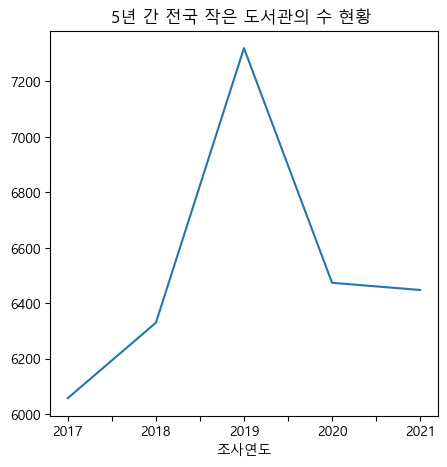

In [24]:
# plot을 활용하여 확인
Small_five_group['조사연도'].count().plot(title = '5년 간 전국 작은 도서관의 수 현황 ',figsize=(5,5))

### 2) 5년 간 지역별 작은 도서관의 수 변화 분석

#### 현황 분석을 위한 그룹화

In [25]:
#groupby를 이용한 그룹화
Small_five_area = Small_five.groupby([Small_five.지역,Small_five.조사연도])

# 해당 칼럼 도서관 명의 수를 세 각 지역을 기준으로 연도별 변화를 파악
Small_five_area_count= Small_five_area[['도서관 명']].count()
Small_five_area_count

# 해당 컬럼을 도서관 수로 설정
Small_five_area_count = Small_five_area_count.rename(columns={'도서관 명' : '도서관 수'})
Small_five_area_count


도서관 명
지역   조사연도       
강원도  2017    183
     2018    197
     2019    225
     2020    199
     2021    217
...          ...
충청북도 2017    221
     2018    234
     2019    284
     2020    230
     2021    240

[85 rows x 1 columns]

도서관 수
지역   조사연도       
강원도  2017    183
     2018    197
     2019    225
     2020    199
     2021    217
...          ...
충청북도 2017    221
     2018    234
     2019    284
     2020    230
     2021    240

[85 rows x 1 columns]

#### 지역명 파악

In [26]:
# #### 현황 분석을 위한 그룹화지역 인덱스 이름 파악 - 기존의 데이터프레임에서 유일값 찾기 사용
Small_five['지역'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

#### 현황 시각화

#### - '5년간 작은 도서관 수 변화:서울'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:서울'}, xlabel='조사연도'>

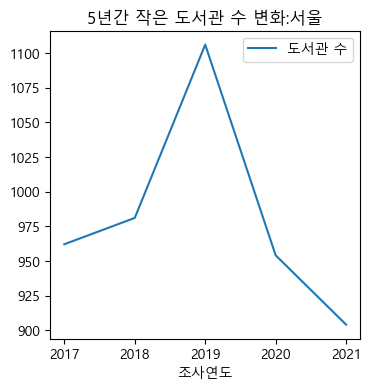

In [27]:
Small_five_area_count.loc['서울특별시'].plot(title='5년간 작은 도서관 수 변화:서울',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:부산'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:부산'}, xlabel='조사연도'>

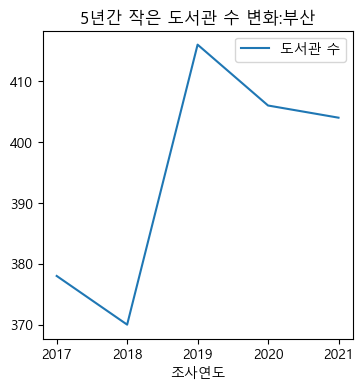

In [28]:
Small_five_area_count.loc['부산광역시'].plot(title='5년간 작은 도서관 수 변화:부산',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:대구'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:대구'}, xlabel='조사연도'>

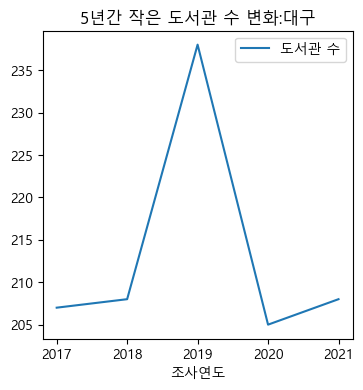

In [30]:
Small_five_area_count.loc['대구광역시'].plot(title='5년간 작은 도서관 수 변화:대구',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:인천'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:인천'}, xlabel='조사연도'>

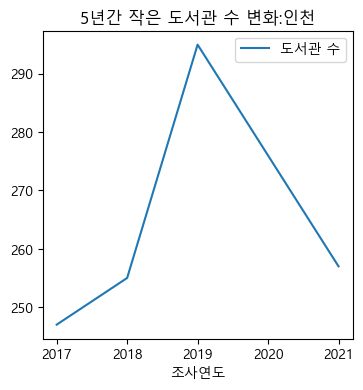

In [31]:
Small_five_area_count.loc['인천광역시'].plot(title='5년간 작은 도서관 수 변화:인천',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:광주'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:광주'}, xlabel='조사연도'>

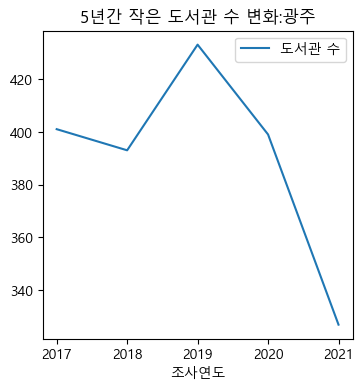

In [32]:
Small_five_area_count.loc['광주광역시'].plot(title='5년간 작은 도서관 수 변화:광주',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:대전'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:대전'}, xlabel='조사연도'>

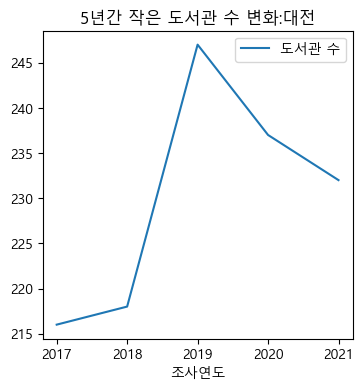

In [33]:
Small_five_area_count.loc['대전광역시'].plot(title='5년간 작은 도서관 수 변화:대전',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:울산'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:울산'}, xlabel='조사연도'>

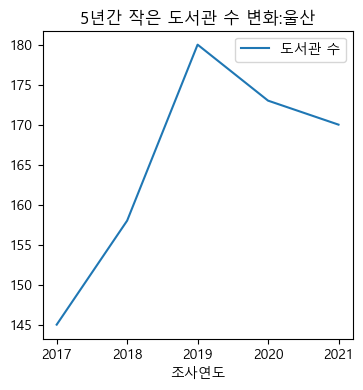

In [34]:
Small_five_area_count.loc['울산광역시'].plot(title='5년간 작은 도서관 수 변화:울산',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:세종'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:세종'}, xlabel='조사연도'>

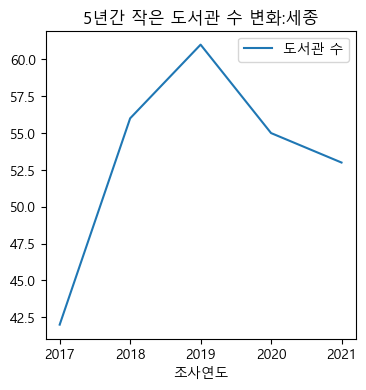

In [35]:
Small_five_area_count.loc['세종특별자치시'].plot(title='5년간 작은 도서관 수 변화:세종',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:경기'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:경기'}, xlabel='조사연도'>

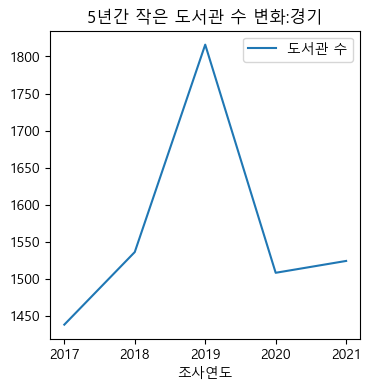

In [36]:
Small_five_area_count.loc['경기도'].plot(title='5년간 작은 도서관 수 변화:경기',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:강원'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:강원'}, xlabel='조사연도'>

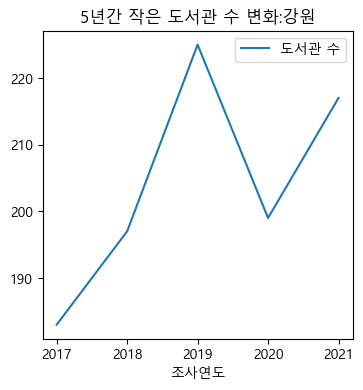

In [37]:
Small_five_area_count.loc['강원도'].plot(title='5년간 작은 도서관 수 변화:강원',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:충북'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:충북'}, xlabel='조사연도'>

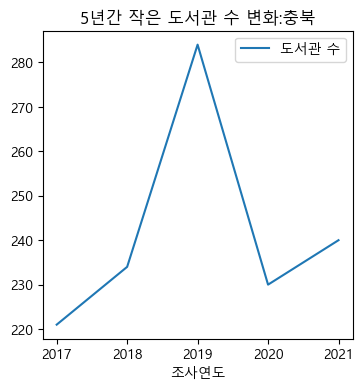

In [38]:
Small_five_area_count.loc['충청북도'].plot(title='5년간 작은 도서관 수 변화:충북',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:충남'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:충남'}, xlabel='조사연도'>

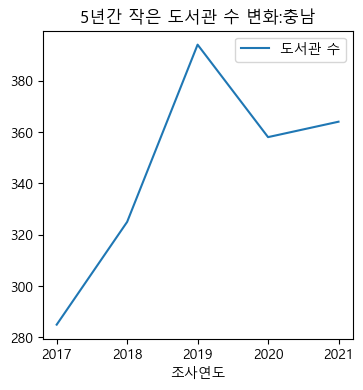

In [39]:
Small_five_area_count.loc['충청남도'].plot(title='5년간 작은 도서관 수 변화:충남',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:전북'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:전북'}, xlabel='조사연도'>

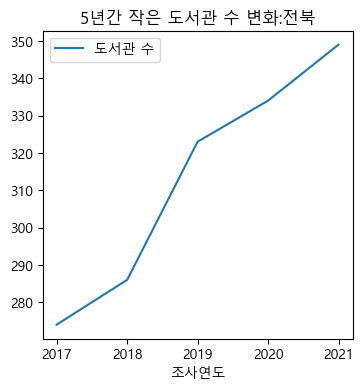

In [40]:
Small_five_area_count.loc['전라북도'].plot(title='5년간 작은 도서관 수 변화:전북',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:전남'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:전남'}, xlabel='조사연도'>

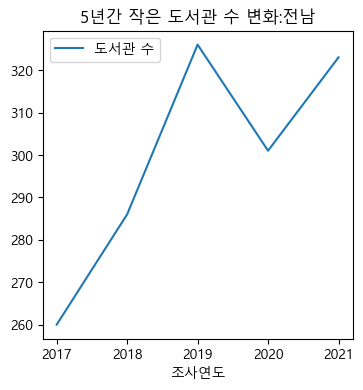

In [41]:
Small_five_area_count.loc['전라남도'].plot(title='5년간 작은 도서관 수 변화:전남',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:경북'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:경북'}, xlabel='조사연도'>

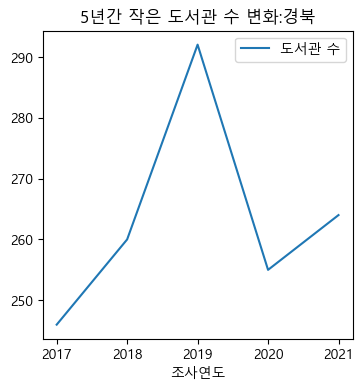

In [42]:
Small_five_area_count.loc['경상북도'].plot(title='5년간 작은 도서관 수 변화:경북',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:경남'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:경남'}, xlabel='조사연도'>

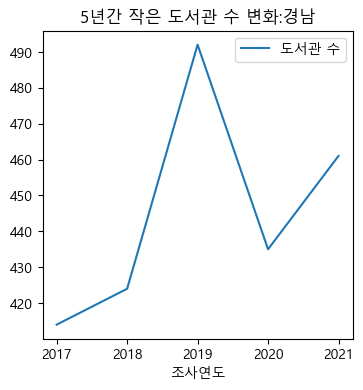

In [43]:
Small_five_area_count.loc['경상남도'].plot(title='5년간 작은 도서관 수 변화:경남',figsize=(4,4))

#### - '5년간 작은 도서관 수 변화:제주'

<AxesSubplot:title={'center':'5년간 작은 도서관 수 변화:제주'}, xlabel='조사연도'>

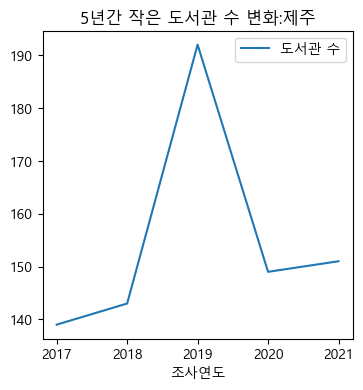

In [44]:
Small_five_area_count.loc['제주특별자치도'].plot(title='5년간 작은 도서관 수 변화:제주',figsize=(4,4))

--------------------

## 2. 작은 도서관의 특성 변화 분석

#### 분석에 필요한 컬럼 확인


In [45]:

Small_five.columns

# 필요한 컬럼 : 특화여부, 외부대출가능여부 , 독서/문화프로그램실시여부 ,도서관홍보여부, 지자체 및 공공도서관으로부터 지원 여부

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

#### 분석에 필요한 컬럼의 value 확인

In [46]:
# 해당 컬럼의 value 확인

Small_five.도서관유형.unique()                   
#1 = 공립, 2 = 사립


Small_five.특화여부.unique()                     
#1 = 특화되지 않음, 2 = 특화됨


Small_five.외부대출가능여부.unique()             
# 1 = Y(그렇다) 0 = N(그렇지 않다)


Small_five['독서/문화프로그램실시여부'].unique() 
# 1 = Y(그렇다), 0 = N(그렇지 않다)


Small_five['도서관 홍보여부'].unique()
# 1 = Y(그렇다), 0 = N(그렇지 않다)


Small_five['지자체 및 공공도서관으로부터의 지원여부'].unique()
# 1 = Y(그렇다), 0 = N(그렇지 않다)


array([1, 2], dtype=int64)

array([1.0, 2.0], dtype=object)

array([1, 0], dtype=object)

array([1, 0], dtype=object)

array([1, 0], dtype=object)

array([1, 0], dtype=object)

### 1) 5년 간 작은 도서관의 사립 및 공립 비율 변화

#### 현황 시각화


조사연도  도서관유형
2017  2        76.77
      1        23.23
2018  2        77.36
      1        22.64
2019  2        79.36
      1        20.64
2020  2        76.77
      1        23.23
2021  2        76.55
      1        23.45
Name: 도서관유형, dtype: float64

<AxesSubplot:title={'center':'5년 간 작은 도서관의 사립 및 공립 비율 변화'}, xlabel='조사연도'>

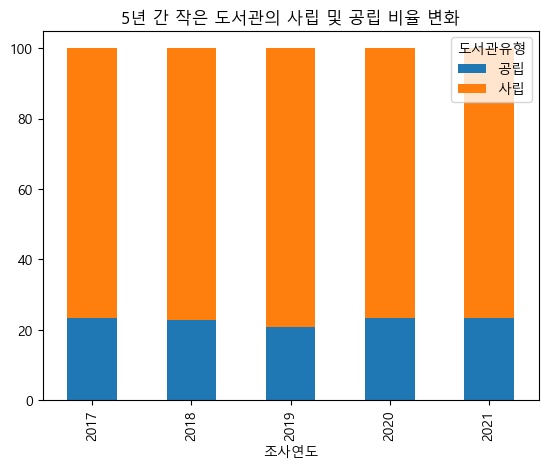

In [47]:

lib_type_1 = np.round(Small_five_group['도서관유형'].value_counts(normalize=True)*100,2)
lib_type_1 #1 = 공립, 2 = 사립

lib_type_1 = lib_type_1.unstack()

lib_type_1 = lib_type_1.rename(columns= {1:'공립' , 2:'사립'}) 
lib_type_1.plot.bar(stacked=True,title='5년 간 작은 도서관의 사립 및 공립 비율 변화' )

### 2) 5년 간 작은 도서관의 사립 및 공립 비율 변화

조사연도  특화여부
2017  1.0     86.40
      2.0     13.60
2018  1.0     86.81
      2.0     13.19
2019  1.0     87.27
      2.0     12.73
2020  1.0     88.08
      2.0     11.92
2021  1.0     88.29
      2.0     11.71
Name: 특화여부, dtype: float64

<AxesSubplot:title={'center':'5년 간 작은 도서관의 특화 및 비특화 비율 변화 '}, xlabel='조사연도'>

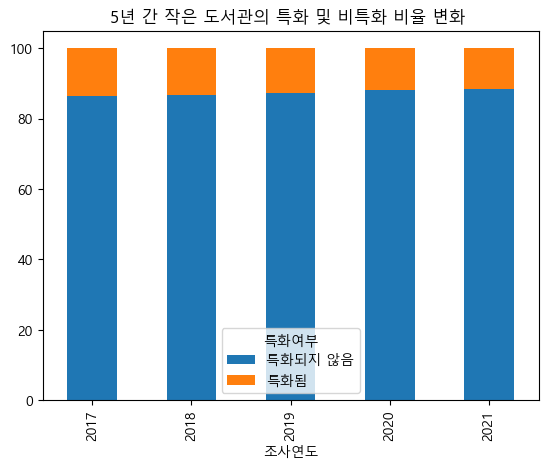

In [48]:
lib_type_2 = np.round(Small_five_group['특화여부'].value_counts(normalize=True)*100,2)
lib_type_2 #1 = 특화되지 않음, 2 = 특화됨

lib_type_2 = lib_type_2.unstack()

lib_type_2 = lib_type_2.rename(columns= {1:'특화되지 않음',2:'특화됨'}) 
lib_type_2.plot.bar(stacked=True, title = '5년 간 작은 도서관의 특화 및 비특화 비율 변화 ')

### 3)  5년 간 작은 도서관의 외부 대출 가능 여부 비율 변화

조사연도  외부대출가능여부
2017  1           79.83
      0           20.17
2018  1           77.85
      0           22.15
2019  1           70.45
      0           29.55
2020  1           78.44
      0           21.56
2021  1           79.44
      0           20.56
Name: 외부대출가능여부, dtype: float64

<AxesSubplot:title={'center':'5년 간 작은 도서관의 외부 대출 가능 여부 비율 변화'}, xlabel='조사연도'>

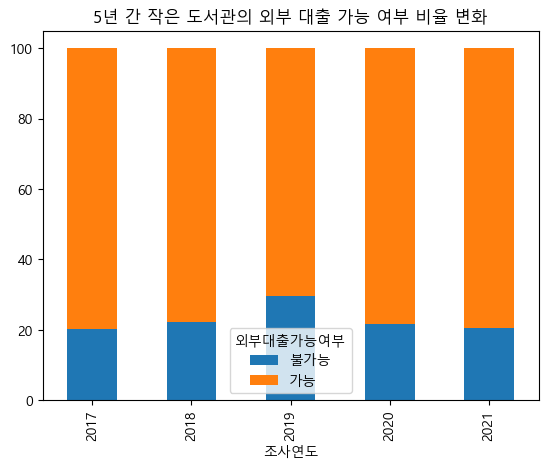

In [49]:
lib_type_3 = np.round(Small_five_group['외부대출가능여부'].value_counts(normalize=True)*100,2)
lib_type_3 #1 = 특화되지 않음, 2 = 특화됨

lib_type_3 = lib_type_3.unstack()

lib_type_3 = lib_type_3.rename(columns= {1:'가능',0:'불가능'}) 
lib_type_3.plot.bar(stacked=True, title = '5년 간 작은 도서관의 외부 대출 가능 여부 비율 변화')

### 4) 5년 간 작은 도서관의 독서/문화프로그램 실시 여부 비율 변화

조사연도  독서/문화프로그램실시여부
2017  1                67.83
      0                32.17
2018  1                66.24
      0                33.76
2019  1                60.75
      0                39.25
2020  1                53.34
      0                46.66
2021  0                69.79
      1                30.21
Name: 독서/문화프로그램실시여부, dtype: float64

<AxesSubplot:title={'center':'5년 간 작은 도서관의 독서/문화프로그램 실시 여부 비율 변화'}, xlabel='조사연도'>

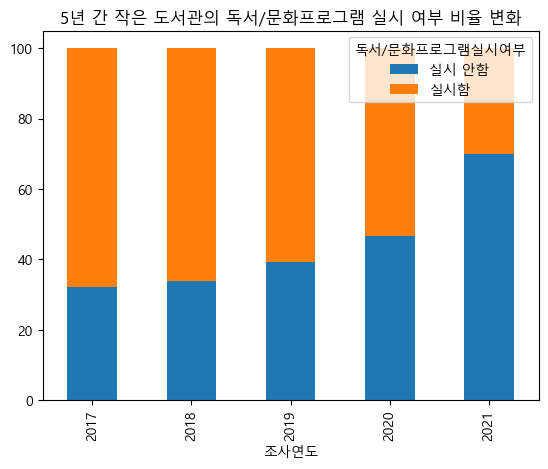

In [50]:
lib_type_4= np.round(Small_five_group['독서/문화프로그램실시여부'].value_counts(normalize=True)*100,2)
lib_type_4 #1 = 특화되지 않음, 2 = 특화됨

lib_type_4 = lib_type_4.unstack()

lib_type_4 = lib_type_4.rename(columns= {1:'실시함',0:'실시 안함'}) 
lib_type_4.plot.bar(stacked=True, title = '5년 간 작은 도서관의 독서/문화프로그램 실시 여부 비율 변화')

### 5) 5년 간 작은 도서관의 도서관 홍보 여부 비율

조사연도  도서관 홍보여부
2017  1           66.74
      0           33.26
2018  1           65.04
      0           34.96
2019  1           59.93
      0           40.07
2020  1           56.52
      0           43.48
2021  1           61.20
      0           38.80
Name: 도서관 홍보여부, dtype: float64

<AxesSubplot:title={'center':'5년 간 작은 도서관의 도서관 홍보 여부 비율'}, xlabel='조사연도'>

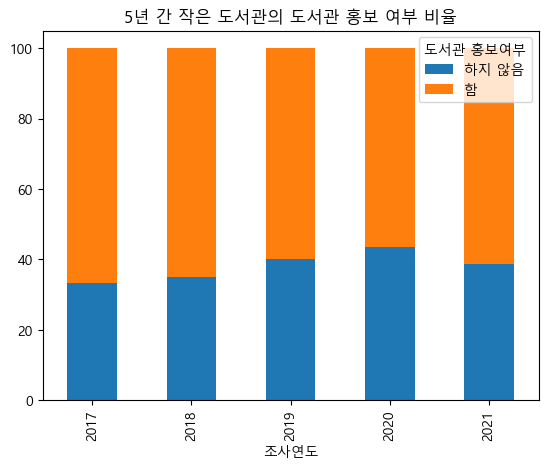

In [51]:
lib_type_5= np.round(Small_five_group['도서관 홍보여부'].value_counts(normalize=True)*100,2)
lib_type_5 #1 = 특화되지 않음, 2 = 특화됨

lib_type_5 = lib_type_5.unstack()

lib_type_5 = lib_type_5.rename(columns= {1:'함',0:'하지 않음'}) 
lib_type_5.plot.bar(stacked=True, title = '5년 간 작은 도서관의 도서관 홍보 여부 비율')

### 6) 5년 간 지자체 및 공공도서관으로부터 지원 여부

조사연도  지자체 및 공공도서관으로부터의 지원여부
2017  1                        60.60
      0                        39.40
2018  1                        57.25
      0                        42.75
2019  1                        51.68
      0                        48.32
2020  1                        59.48
      0                        40.52
2021  1                        60.07
      0                        39.93
Name: 지자체 및 공공도서관으로부터의 지원여부, dtype: float64

<AxesSubplot:title={'center':'지자체 및 공공도서관으로부터의 지원여부'}, xlabel='조사연도'>

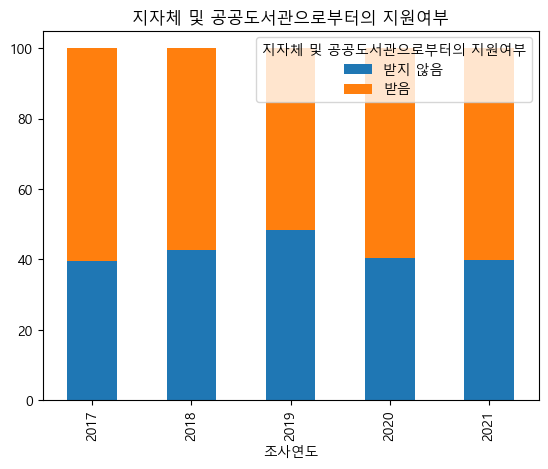

In [52]:
lib_type_6 = np.round(Small_five_group['지자체 및 공공도서관으로부터의 지원여부'].value_counts(normalize=True)*100,2)
lib_type_6 #1=Y(그렇다), 0=N(그렇지 않다)

lib_type_6 = lib_type_6.unstack()

lib_type_6 = lib_type_6.rename(columns= {1:'받음' , 0:'받지 않음'}) 
lib_type_6.plot.bar(stacked=True, title = '지자체 및 공공도서관으로부터의 지원여부')

--------------------

## 3. 도서관 장서 및 대출 변화 분석

#### 분석에 필요한 컬럼 확인


In [53]:
Small_five.columns

# 필요한 컬럼 명 : 도서관자료(권),도서대출권수

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

### 1) 5년 간 전국 작은 도서관의 보유장서 수와 대출 수 변화

In [54]:
Small_five_book = Small_five_group[['현재 총 보유장서의 수(권)','도서대출권수']]
Small_five_bookmean = Small_five_group[['현재 총 보유장서의 수(권)']]


# 대략적인 그룹별 데이터 확인
Small_five_book.describe()


현재 총 보유장서의 수(권)                                                    \
               count         mean          std     min     25%     50%   
조사연도                                                                     
2017          6058.0  6143.127600  4886.243921  1000.0  2700.0  4902.5   
2018          6330.0  6167.936335  4914.765881  1000.0  2664.0  4934.5   
2019          7320.0  5614.523907  5081.144572     0.0  2000.0  4272.0   
2020          6474.0  6249.338585  5067.066345  1000.0  2600.0  4966.0   
2021          6448.0  6271.521247  5039.666419  1000.0  2607.5  4983.5   

                        도서대출권수                                                \
          75%      max   count         mean           std  min    25%    50%   
조사연도                                                                           
2017  8000.00  58000.0  6058.0  3231.185375   7429.104145  0.0  50.00  600.0   
2018  8071.25  60000.0  6330.0  3189.560190  10475.267095  0.0  22.50  540.0   
2019  7800.00  60000.0  7320.0  2720.384153   7780.549603  0.0   0.00  300.0   
2020  8305.00  77838.0  6474.0  1634.702657   3877.432415  0.0  13.25  300.0   
2021  8407.75  60000.0  6448.0  2579.430366   6489.970653  0.0  20.00  400.0   

                         
          75%       max  
조사연도                     
2017  3440.25  161850.0  
2018  3242.00  600000.0  
2019  2643.50  328500.0  
2020  1636.00   96700.0  
2021  2427.75  151599.0

In [55]:
# boxplot을 사용해보니 10000권 이하에서 평균이 잡혔으나 이상치가 많이 나오는 상태로 표현되는 게 신기했다!
# 가장 높은 이상치는 describe()의 max이다
# 지금은 시간이 없어서 시도를 못하지만 나중에는 qcut 등을 적용해볼 수도 있을 거 같다




#### 현황 시각화

2017         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2018    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2019         AxesSubplot(0.1,0.414706;0.363636x0.220588)
2020    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
2021             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

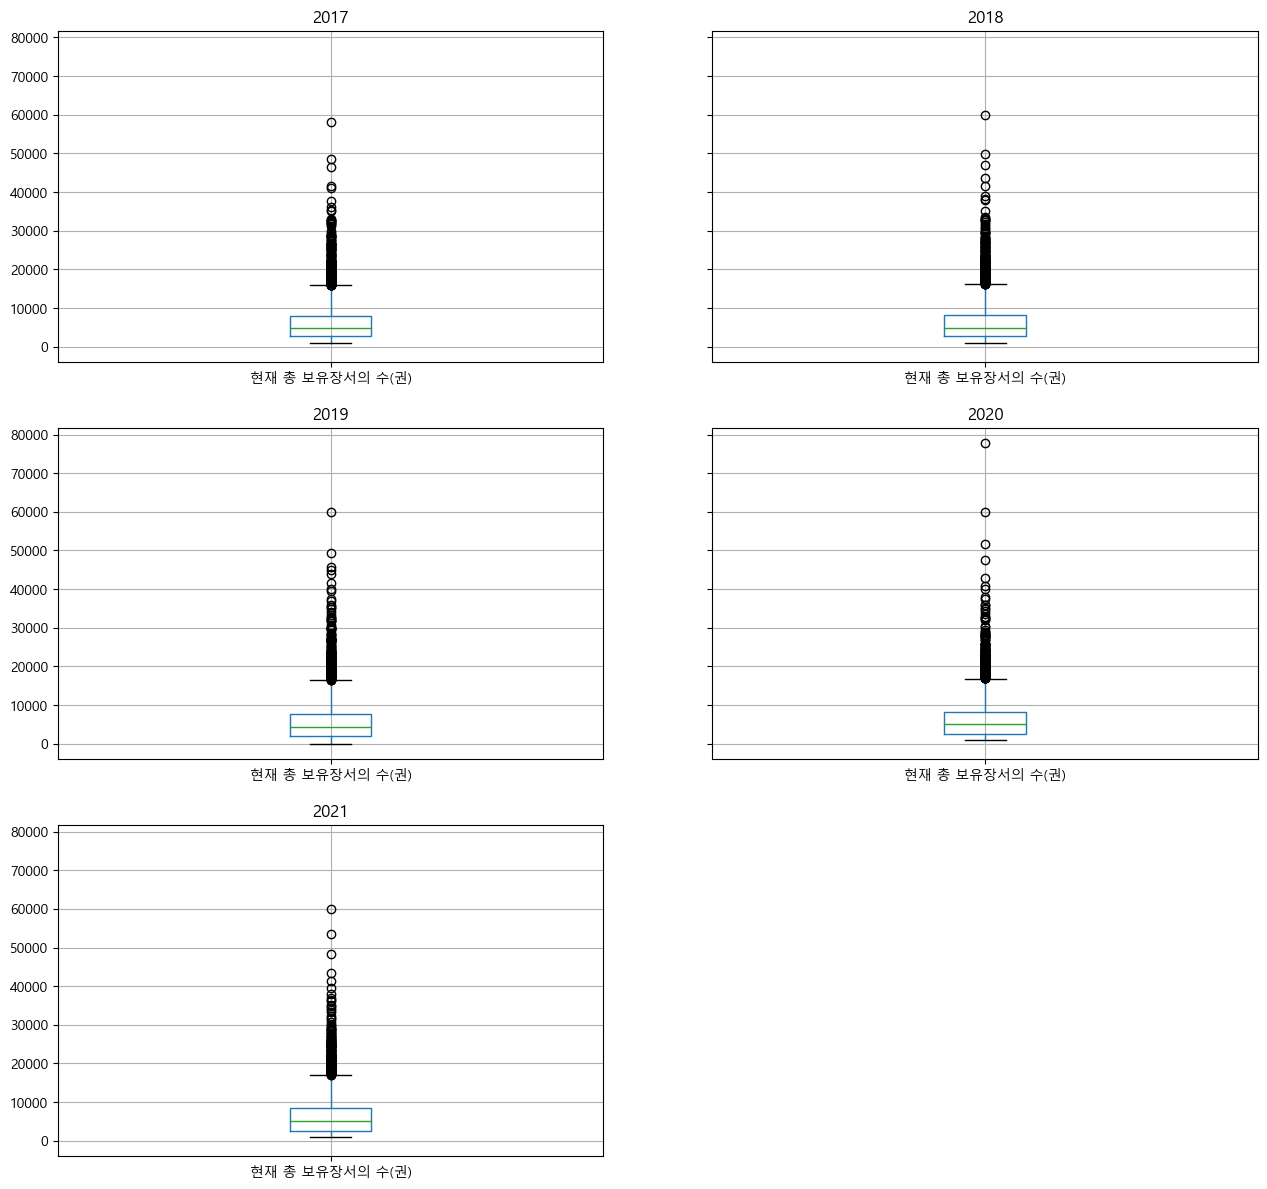

In [56]:
Small_five_bookmean.boxplot(figsize=(15,15))

<AxesSubplot:title={'center':'연도 별 현재 총 보유장서의 수(권)와 도서대출권수의 변화'}, xlabel='조사연도'>

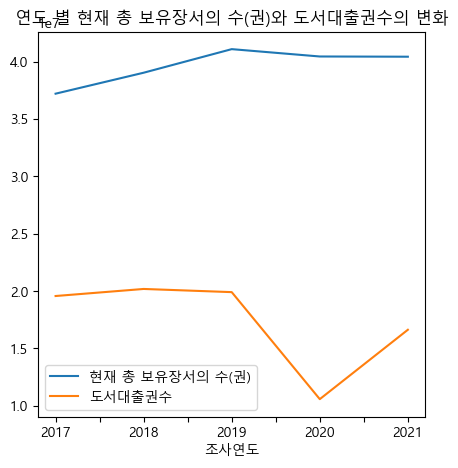

In [57]:
Small_five_book.sum().plot(figsize=(5,5), title = '연도 별 현재 총 보유장서의 수(권)와 도서대출권수의 변화')

----------------

## 4. 작은 도서관의 이용자 변화 분석

#### 분석에 필요한 컬럼 확인

In [58]:
Small_five.columns

# 필요한 컬럼 명 : 연간 총 이용자수(명), '등록된 총 이용자수(회원등록자 수)'

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

###  1) 5년 간 전국 작은 도서관의 연간 총 이용자수와 회원등록자 수 변화

In [59]:
Small_five_user = Small_five_group[['연간 총 이용자수(명)','등록된 총 이용자수(회원등록자 수)']]

# 대략적인 그룹별 데이터 확인
Small_five_user.describe()



연간 총 이용자수(명)                                                          \
            count         mean           std  min     25%     50%     75%   
조사연도                                                                        
2017       6058.0  6119.524431  11058.737822  0.0  1325.0  3393.0  7199.0   
2018       6330.0  5850.003002  10061.341113  0.0  1305.0  3285.5  6886.0   
2019       7320.0  5353.638934  11010.086886  0.0  1000.0  2875.5  6260.0   
2020       6474.0  3396.286840  30259.592138  0.0   384.0  1200.0  3000.0   
2021       6448.0  3404.992866   7667.808193  0.0   725.0  1825.0  3915.0   

                등록된 총 이용자수(회원등록자 수)                                            \
            max               count         mean           std  min  25%  50%   
조사연도                                                                            
2017   248200.0              6058.0  1587.505282  14694.212223  0.0  0.0  0.0   
2018   224756.0              6330.0  1387.512322  14167.533899  0.0  0.0  0.0   
2019   327801.0              7320.0  2187.244809  18539.508576  0.0  0.0  0.0   
2020  1899000.0              6474.0  4801.874575  32869.665518  0.0  0.0  0.0   
2021   386802.0              6448.0  5190.588244  35961.715888  0.0  0.0  0.0   

                        
         75%       max  
조사연도                    
2017  331.00  263026.0  
2018  293.75  317156.0  
2019  210.25  312099.0  
2020  273.00  339330.0  
2021  248.00  412016.0

#### 현황 시각화

<AxesSubplot:title={'center':'연도 별 총 이용자수와 등록된 총 이용자수(회원등록자 수) 변화'}, xlabel='조사연도'>

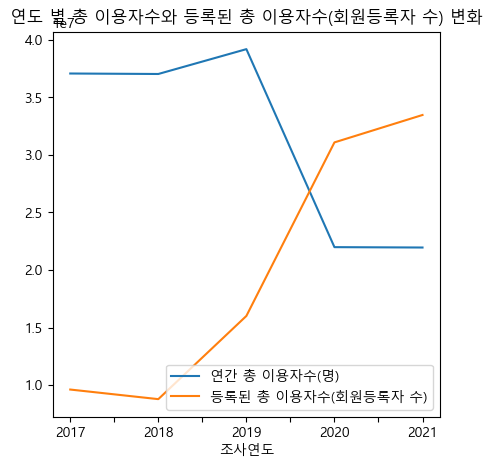

In [60]:
# 플롯을 통해 확인
Small_five_user.sum().plot(figsize=(5,5),title = '연도 별 총 이용자수와 등록된 총 이용자수(회원등록자 수) 변화' )

----------------

## 5. 작은 도서관의 독서/문화프로그램 관련 변화 분석

#### 분석에 필요한 컬럼 확인

In [61]:
Small_five.columns

# 필요한 컬럼 명 : 독서프로그램 실시횟수(건),문화프로그램 실시횟수(건), 독서프로그램 참가자 수, 문화프로그램 참가자 수

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

### 1) 5년 간 전국 작은 도서관의 연간 총 이용자수와 회원등록자 수 변화

In [62]:
Small_five_program = Small_five_group[['독서프로그램 실시횟수(건)','문화프로그램 실시횟수(건)']]
Small_five_program.describe()

독서프로그램 실시횟수(건)                                                    \
              count       mean        std  min  25%  50%   75%    max   
조사연도                                                                    
2017         6058.0   2.326841   6.393343  0.0  0.0  1.0   2.0  192.0   
2018         6330.0   2.542654   8.846785  0.0  0.0  1.0   3.0  273.0   
2019         7320.0   2.310383   8.713101  0.0  0.0  1.0   2.0  364.0   
2020         6474.0   1.415972   4.627058  0.0  0.0  0.0   2.0  250.0   
2021         6448.0  17.091811  50.146161  0.0  0.0  1.0  14.0  999.0   

     문화프로그램 실시횟수(건)                                                    
              count       mean        std  min  25%  50%   75%    max  
조사연도                                                                   
2017         6058.0   2.891879   6.038184  0.0  0.0  1.0   3.0  120.0  
2018         6330.0   2.909637   6.628893  0.0  0.0  1.0   3.0  245.0  
2019         7320.0   3.018852   7.859048  0.0  0.0  1.0   3.0  252.0  
2020         6474.0   1.833642   4.803473  0.0  0.0  0.0   2.0  200.0  
2021         6448.0  16.643455  50.229505  0.0  0.0  0.0  12.0  999.0

#### 현황 시각화

<AxesSubplot:xlabel='조사연도'>

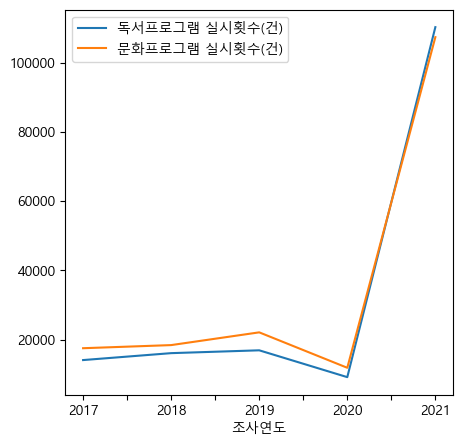

In [63]:
Small_five_program.sum().plot(figsize=(5,5))

### 2) 5년 간 작은 도서관의 독서/문화프로그램 참가 회원 분석

In [64]:
Small_five_p = Small_five_group[['독서 프로그램 참가자 수(명)','문화프로그램참가자 수 (명)']].mean()
Small_five_program.describe()

독서프로그램 실시횟수(건)                                                    \
              count       mean        std  min  25%  50%   75%    max   
조사연도                                                                    
2017         6058.0   2.326841   6.393343  0.0  0.0  1.0   2.0  192.0   
2018         6330.0   2.542654   8.846785  0.0  0.0  1.0   3.0  273.0   
2019         7320.0   2.310383   8.713101  0.0  0.0  1.0   2.0  364.0   
2020         6474.0   1.415972   4.627058  0.0  0.0  0.0   2.0  250.0   
2021         6448.0  17.091811  50.146161  0.0  0.0  1.0  14.0  999.0   

     문화프로그램 실시횟수(건)                                                    
              count       mean        std  min  25%  50%   75%    max  
조사연도                                                                   
2017         6058.0   2.891879   6.038184  0.0  0.0  1.0   3.0  120.0  
2018         6330.0   2.909637   6.628893  0.0  0.0  1.0   3.0  245.0  
2019         7320.0   3.018852   7.859048  0.0  0.0  1.0   3.0  252.0  
2020         6474.0   1.833642   4.803473  0.0  0.0  0.0   2.0  200.0  
2021         6448.0  16.643455  50.229505  0.0  0.0  0.0  12.0  999.0

#### 현황 시각화

<AxesSubplot:xlabel='조사연도'>

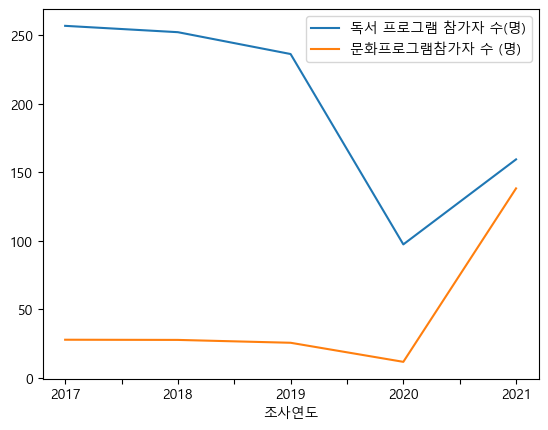

In [65]:
Small_five_p.plot()

----------------

## 6. 작은 도서관 예산 및 지원금 분석

#### 분석에 필요한 컬럼 확인

In [66]:
Small_five.columns

# 필요한 컬럼 명 : 총 도서관 예산, 지원받은 예산

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

### 1) 5년 간 작은 도서관의 총 도서관 예산 변화

In [67]:

Small_five_money = Small_five_group[['총 도서관 예산']]
Small_five_money.describe()

총 도서관 예산                                                         \
        count          mean           std  min        25%        50%   
조사연도                                                                   
2017   6058.0  1.199821e+07  2.184733e+07  0.0  1000000.0  4700000.0   
2018   6330.0  1.234107e+07  2.139123e+07  0.0  1000000.0  4507500.0   
2019   7320.0  1.206315e+07  2.424120e+07  0.0      865.0  3600000.0   
2020   6474.0  1.332092e+07  2.440626e+07  0.0  1000000.0  4639375.0   
2021   6448.0  1.397053e+07  2.815800e+07  0.0  1196197.5  5000000.0   

                                
             75%           max  
조사연도                            
2017  14000000.0  5.394620e+08  
2018  14198867.5  4.806600e+08  
2019  13001250.0  5.601002e+08  
2020  15000000.0  4.937510e+08  
2021  15881325.5  1.248100e+09

#### 현황 시각화

<AxesSubplot:title={'center':'5년 간 작은도서관의 총 도서관 예산 변화'}, xlabel='조사연도'>

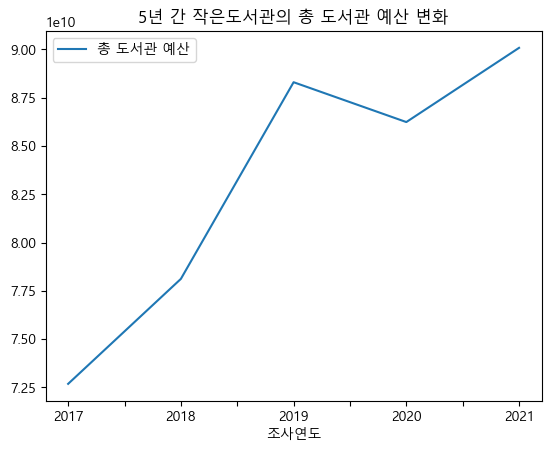

In [68]:
Small_five_money.sum().plot(title = '5년 간 작은도서관의 총 도서관 예산 변화')

### 2) 5년 간 작은 도서관의 총 도서관 지원금 변화

In [69]:
Small_five_money_suport = Small_five_group[['지원받은 예산(원)']]
Small_five_money_suport.describe()


지원받은 예산(원)                                                        \
          count          mean           std  min  25%  50%        75%   
조사연도                                                                    
2017     6058.0  5.102032e+06  1.539886e+07  0.0  0.0  0.0  4000000.0   
2018     6330.0  5.197471e+06  1.615296e+07  0.0  0.0  0.0  4000000.0   
2019     7320.0  4.902801e+06  1.547302e+07  0.0  0.0  0.0  3700000.0   
2020     6474.0  5.896050e+06  1.689596e+07  0.0  0.0  0.0  4500000.0   
2021     6448.0  6.050600e+06  1.700902e+07  0.0  0.0  0.0  4100000.0   

                   
              max  
조사연도               
2017  411600000.0  
2018  529103000.0  
2019  467700000.0  
2020  493751000.0  
2021  509137000.0

#### 현황 시각화

<AxesSubplot:title={'center':'5년 간 작은 도서관의 지원금 변화'}, xlabel='조사연도'>

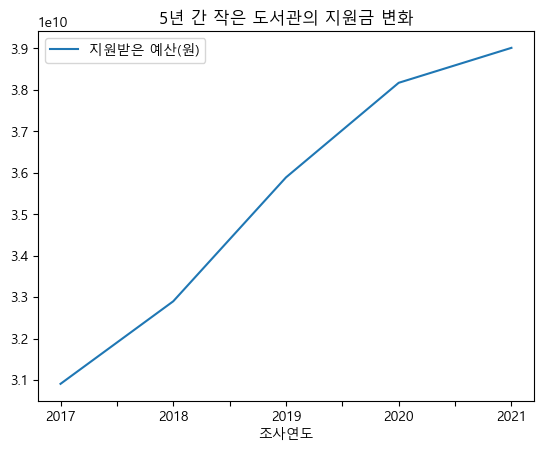

In [70]:
Small_five_money_suport.sum().plot(title='5년 간 작은 도서관의 지원금 변화')

---------

## 7. 작은 도서관 상근 직원 및 지원 인력 관련 분석

#### 분석에 필요한 컬럼 확인

In [71]:
Small_five.columns

# 필요한 컬럼 명 : '상근직원 수' ,'지원받은 인력(명)'
# 시간이 없어 해당 부분만을 분석하기로 함 '지원받은 인력(명)'

Index(['도서관 명', '개관일', '지역', '도서관유형', '특화여부', '일평균 운영시간', '연간 총 운영일',
       '건물면적(㎡)', '열람(석)', '도서관자료(권)', '현재 총 보유장서의 수(권)',
       '현재 총 보유 연속간행물의 수(종)', '상근직원 수', '시간제 직원 수', '정기적 자원봉사자(명)',
       '비정기적자원봉사자(명)', '도서구입비(원)', '인건비(원)', '운영비(원)', '총 도서관 예산', '외부대출가능여부',
       '도서대출권수', '연간 총 이용자수(명)', '등록된 총 이용자수(회원등록자 수)', '독서/문화프로그램실시여부',
       '독서프로그램 실시횟수(건)', '독서프로그램 수(건)', '독서 프로그램 참가자 수(명)', '문화프로그램 실시횟수(건)',
       '문화프로그램참가자 수 (명)', '문화 프로그램 수(건)', '도서관 홍보여부', '지자체 및 공공도서관으로부터의 지원여부',
       '지원받은 인력(명)', '지원받은 예산(원)', '지원받은 지원장서(권)', '지원받은 독서/문화프로그램(건)',
       '조사연도'],
      dtype='object')

### 1) 5년 간 작은 도서관 상근 직원 수 변화 

In [72]:
# 관리자 부재 문제 
Small_five_staff = Small_five_group[['상근직원 수']]
Small_five_staff.describe()





상근직원 수                                              
       count      mean       std  min  25%  50%  75%   max
조사연도                                                      
2017  6058.0  0.670683  0.747238  0.0  0.0  1.0  1.0   8.0
2018  6330.0  0.641548  0.718101  0.0  0.0  1.0  1.0   8.0
2019  7320.0  0.621311  0.815068  0.0  0.0  0.0  1.0  19.0
2020  6474.0  0.641643  0.739164  0.0  0.0  1.0  1.0   8.0
2021  6448.0  0.660670  0.709958  0.0  0.0  1.0  1.0   6.0

#### 현황 시각화

2017         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2018    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2019         AxesSubplot(0.1,0.414706;0.363636x0.220588)
2020    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
2021             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

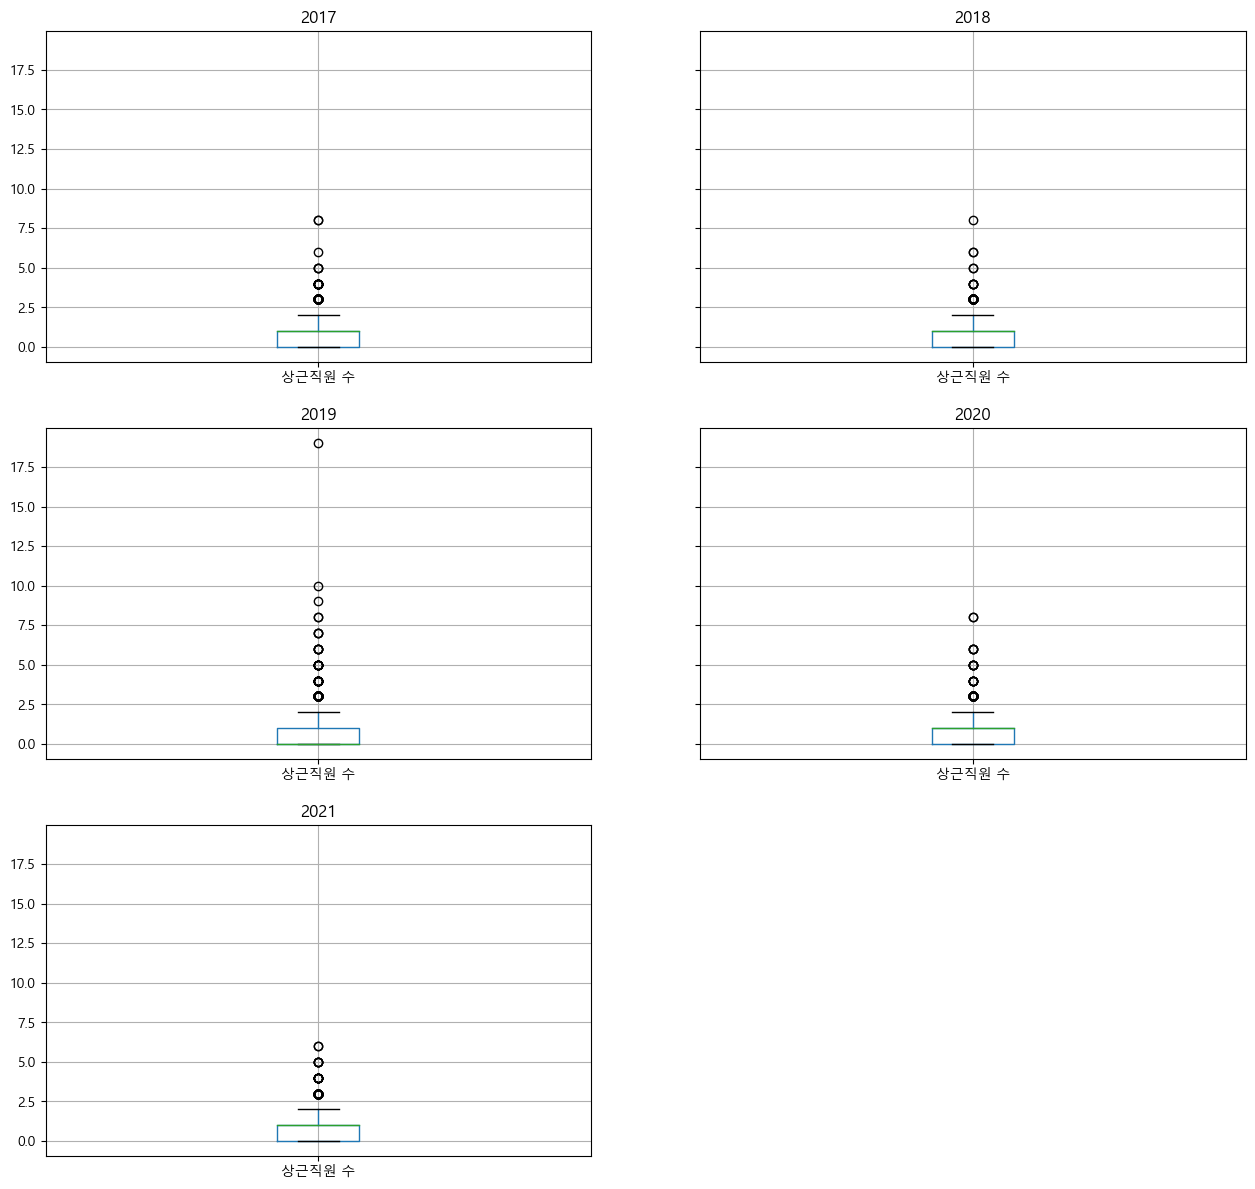

In [73]:
Small_five_staff.boxplot(figsize=(15,15))


<AxesSubplot:xlabel='조사연도'>

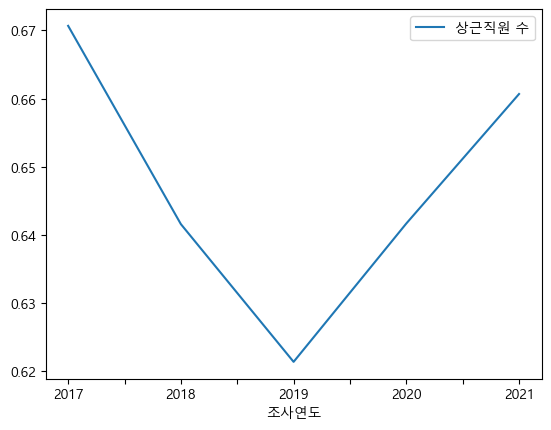

In [74]:
Small_five_staff.mean().plot()

### 2) 5년 간 작은 도서관이 지원받은 인력 수 변화 

In [75]:
# 관리자 부재 문제 
Small_five_support= Small_five_group[['지원받은 인력(명)']]
Small_five_support.describe()



지원받은 인력(명)                                                
          count      mean        std  min  25%  50%  75%    max
조사연도                                                           
2017     6058.0  0.468967  11.614585  0.0  0.0  0.0  0.0  900.0
2018     6330.0  0.338547   1.656727  0.0  0.0  0.0  0.0   70.0
2019     7320.0  0.303142   1.225070  0.0  0.0  0.0  0.0   45.0
2020     6474.0  0.376892   1.080878  0.0  0.0  0.0  0.0   19.0
2021     6448.0  0.396402   2.826090  0.0  0.0  0.0  0.0  209.0

#### 현황 시각화

<AxesSubplot:xlabel='조사연도'>

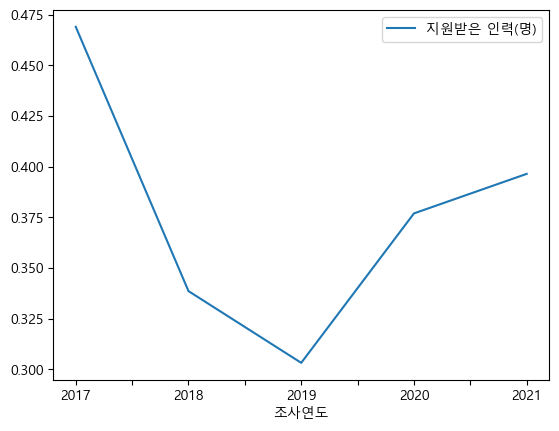

In [76]:
Small_five_support.mean().plot()

---------